# Laboratorio 3
### Majo Gil 20337
### Joshua Chicoj 20566

## Análisis exploratorio

Comenzamos extrayendo las imágenes del .zip

In [7]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import shutil
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
zip_ref = zipfile.ZipFile("./data/PolyMNIST.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [12]:
# Walk through MMNIST directory and list number of files
for dirpath, dirnames, filenames in os.walk("MMNIST"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'MMNIST'.
There are 5 directories and 0 images in 'MMNIST\test'.
There are 0 directories and 10000 images in 'MMNIST\test\m0'.
There are 0 directories and 10000 images in 'MMNIST\test\m1'.
There are 0 directories and 10000 images in 'MMNIST\test\m2'.
There are 0 directories and 10000 images in 'MMNIST\test\m3'.
There are 0 directories and 10000 images in 'MMNIST\test\m4'.
There are 5 directories and 0 images in 'MMNIST\train'.
There are 0 directories and 60000 images in 'MMNIST\train\m0'.
There are 0 directories and 60000 images in 'MMNIST\train\m1'.
There are 0 directories and 60000 images in 'MMNIST\train\m2'.
There are 0 directories and 60000 images in 'MMNIST\train\m3'.
There are 0 directories and 60000 images in 'MMNIST\train\m4'.


Podemos ver que cada una de las diferentes formas en que se presentan las imágenes contiene la misma cantidad de archivos, tanto en el conjunto de entrenamiento como en el de pruebas

In [14]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

Image shape: (28, 28, 3)


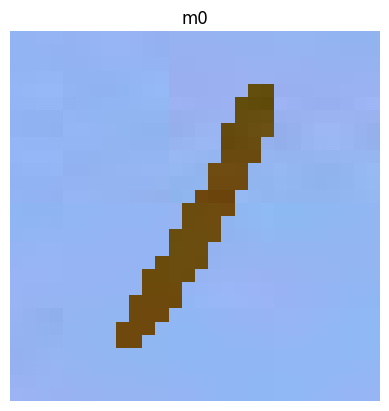

In [15]:
view_random_image(target_dir="MMNIST/train/",
                        target_class="m0")

Image shape: (28, 28, 3)


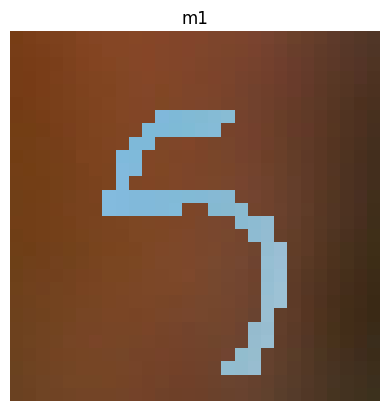

In [16]:
view_random_image(target_dir="MMNIST/train/",
                        target_class="m1")

Image shape: (28, 28, 3)


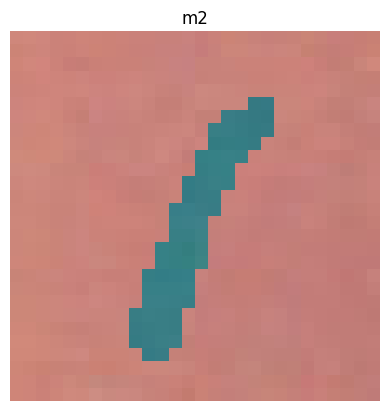

In [17]:
view_random_image(target_dir="MMNIST/train/",
                        target_class="m2")

Image shape: (28, 28, 3)


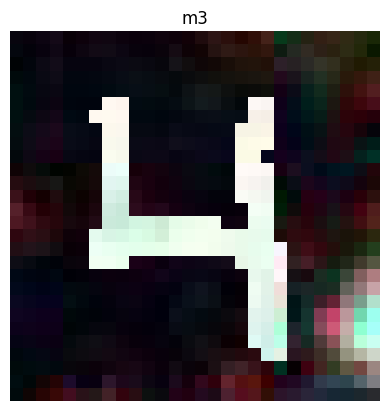

In [18]:
view_random_image(target_dir="MMNIST/train/",
                        target_class="m3")

Image shape: (28, 28, 3)


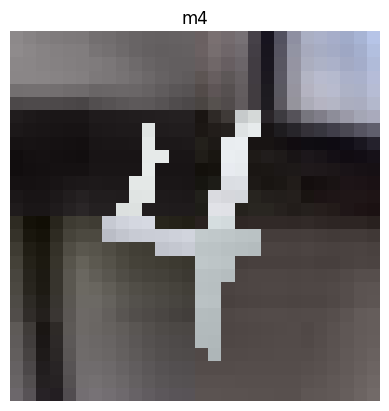

In [19]:
view_random_image(target_dir="MMNIST/train/",
                        target_class="m4")

In [21]:
for i in range(5):
    data_dir = pathlib.Path(f"MMNIST/train/m{i}") # turn our training path into a Python path
    class_names = np.array(sorted([item.name.split('.')[1] for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
    
    unique_values, counts = np.unique(class_names, return_counts=True)
    
    print(f"m{i} classes")
    
    for value, count in zip(unique_values, counts):
        print(f"{value} occurs {count} times")

m0 contiene
0 occurs 5923 times
1 occurs 6742 times
2 occurs 5958 times
3 occurs 6131 times
4 occurs 5842 times
5 occurs 5421 times
6 occurs 5918 times
7 occurs 6265 times
8 occurs 5851 times
9 occurs 5949 times
m1 contiene
0 occurs 5923 times
1 occurs 6742 times
2 occurs 5958 times
3 occurs 6131 times
4 occurs 5842 times
5 occurs 5421 times
6 occurs 5918 times
7 occurs 6265 times
8 occurs 5851 times
9 occurs 5949 times
m2 contiene
0 occurs 5923 times
1 occurs 6742 times
2 occurs 5958 times
3 occurs 6131 times
4 occurs 5842 times
5 occurs 5421 times
6 occurs 5918 times
7 occurs 6265 times
8 occurs 5851 times
9 occurs 5949 times
m3 contiene
0 occurs 5923 times
1 occurs 6742 times
2 occurs 5958 times
3 occurs 6131 times
4 occurs 5842 times
5 occurs 5421 times
6 occurs 5918 times
7 occurs 6265 times
8 occurs 5851 times
9 occurs 5949 times
m4 contiene
0 occurs 5923 times
1 occurs 6742 times
2 occurs 5958 times
3 occurs 6131 times
4 occurs 5842 times
5 occurs 5421 times
6 occurs 5918 times


Notemos que cada modalidad diferente en la que se presentan los datos contiene exactamente la misma cantidad de imágenes por cada clase. Es decir, todas las modalidades (m0-4) contienen

| Dígito | Frecuencia |
|--------|------------|
| 0      | 5923       |
| 1      | 6742       |
| 2      | 5958       |
| 3      | 6131       |
| 4      | 5842       |
| 5      | 5421       |
| 6      | 5918       |
| 7      | 6265       |
| 8      | 5851       |
| 9      | 5949       |

Esto indica que, aunque no por mucho, el conjunto de datos de entrenamiento no está balanceado.

In [13]:
def get_shapes(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    shapes = []
    
    # Get files from path
    for file in os.listdir(target_folder):
        # Read in the image and get shape
        img = mpimg.imread(target_folder + "/" + file)
        shapes.append(str(img.shape))
    
    shapes = np.array(shapes)
    return np.unique(shapes, return_counts=True)

In [14]:
for i in range(5):
    unique_values, counts = get_shapes(target_dir="MMNIST/train/", target_class=f"m{i}")
    
    print(f"m{i} shapes")
    for value, count in zip(unique_values, counts):
        print(f"{value} occurs {count} times")

m0 shapes
(28, 28, 3) occurs 60000 times
m1 shapes
(28, 28, 3) occurs 60000 times
m2 shapes
(28, 28, 3) occurs 60000 times
m3 shapes
(28, 28, 3) occurs 60000 times
m4 shapes
(28, 28, 3) occurs 60000 times


En el output anterior podemos ver que todas las imágenes en cada una de las clases son de 28x28 píxeles, todas a color

## CNN's

Preparamos carpetas de train y test por en las cuales alojaremos las imagenes de las diferentes clases

In [15]:
folder = "./data/Numbers/"
sub_dirs = ['train/', 'test/']
label_dirs = ['0/', '1/', '2/', '3/', '4/', '5/', '6/', '7/', '8/', '9/']

In [16]:
for sub_dir in sub_dirs:
 # create label subdirectories
    for label_dir in label_dirs:
        new_dir = folder + sub_dir + label_dir
        os.makedirs(new_dir, exist_ok=True)

In [17]:
for sub_dir in sub_dirs:
    for i in range(5):
        src_directory = f'MMNIST/{sub_dir}/m{i}/'
        
        for file in os.listdir(src_directory):
            dst_dir = f'{folder}{sub_dir}{file.split(".")[1]}/m{i}.{file}'
            
            try:
                shutil.copy2(src_directory + file, dst_dir)
            except PermissionError as e:
                print(f"Error de permisos al copiar {file}: {e}")
            except Exception as e:
                print(f"Ocurrió un error al copiar {file}: {e}")

### Preprocesamiento de imagenes

In [18]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "data/Numbers/train/"
test_dir = "data/Numbers/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(28, 28), # convert all images to be 28 x 28
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(28, 28),
                                               class_mode="categorical",
                                               seed=42)

train_steps_per_epoch = int(np.ceil((len(train_data)/32)-1))
validation_steps_per_epoch = int(np.ceil((len(valid_data)/32)-1))

Found 300000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.


### Modelo 1

In [11]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(10, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation="softmax")
])
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,372 (44.42 KB)

 Trainable params: 11,372 (44.42 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
# Compile the model
model_1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"], run_eagerly=True)

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(f'./models/cnn_1.keras', monitor='val_loss', save_best_only=True)

history_1 = model_1.fit(train_data, epochs=10, steps_per_epoch=train_steps_per_epoch, validation_data=valid_data, validation_steps=validation_steps_per_epoch, callbacks=[early_stopping, model_checkpoint], verbose=2)

### Validacion del modelo

In [24]:
loss , acc = model_1.evaluate(valid_data, steps=len(valid_data), verbose=1)
print('> %.3f' % (acc * 100.0))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9613 - loss: 0.1251
> 96.202


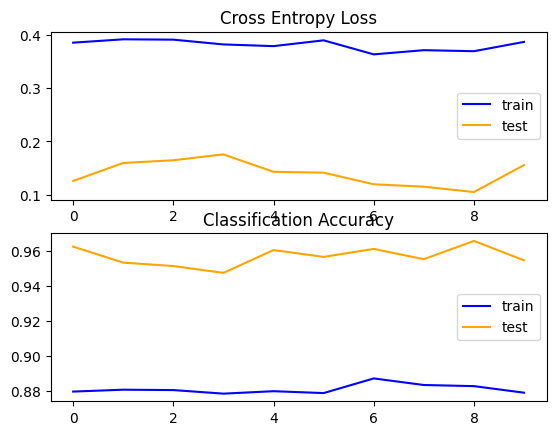

In [25]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_1.history['loss'], color='blue', label='train')
plt.plot(history_1.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_1.history['accuracy'], color='blue', label='train')
plt.plot(history_1.history['val_accuracy'], color='orange', label='test')
plt.legend()

## Redes neuronales simples 

In [15]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation="softmax")
])
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       301,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311,850 (1.19 MB)

 Trainable params: 311,850 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_3.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"], run_eagerly=True)

In [17]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(f'./models/snn_1.keras', monitor='val_loss', save_best_only=True)

history_3 = model_3.fit(train_data, epochs=100, steps_per_epoch=train_steps_per_epoch, validation_data=valid_data, validation_steps=validation_steps_per_epoch, callbacks=[early_stopping, model_checkpoint], verbose=2)

Epoch 1/100
292/292 - 19s - 67ms/step - accuracy: 0.1302 - loss: 2.2975 - val_accuracy: 0.2025 - val_loss: 2.2033
Epoch 2/100
292/292 - 18s - 63ms/step - accuracy: 0.1940 - loss: 2.1580 - val_accuracy: 0.2832 - val_loss: 1.9918
Epoch 3/100
292/292 - 18s - 62ms/step - accuracy: 0.2356 - loss: 2.0701 - val_accuracy: 0.3197 - val_loss: 1.8693
Epoch 4/100
292/292 - 18s - 62ms/step - accuracy: 0.2560 - loss: 2.0385 - val_accuracy: 0.3464 - val_loss: 1.8803
Epoch 5/100
292/292 - 18s - 63ms/step - accuracy: 0.2789 - loss: 1.9661 - val_accuracy: 0.3327 - val_loss: 1.8644
Epoch 6/100
292/292 - 18s - 60ms/step - accuracy: 0.2986 - loss: 1.9236 - val_accuracy: 0.3594 - val_loss: 1.8014
Epoch 7/100
292/292 - 18s - 63ms/step - accuracy: 0.2969 - loss: 1.9368 - val_accuracy: 0.4134 - val_loss: 1.7729
Epoch 8/100
292/292 - 18s - 63ms/step - accuracy: 0.3082 - loss: 1.8828 - val_accuracy: 0.4219 - val_loss: 1.6578
Epoch 9/100
292/292 - 18s - 61ms/step - accuracy: 0.3190 - loss: 1.8821 - val_accuracy: 

C:\Users\Pendiente\miniconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


292/292 - 2s - 8ms/step - accuracy: 0.3962 - loss: 1.7387 - val_accuracy: 0.5035 - val_loss: 1.4688
Epoch 34/100
292/292 - 18s - 61ms/step - accuracy: 0.4080 - loss: 1.6730 - val_accuracy: 0.5365 - val_loss: 1.4122
Epoch 35/100
292/292 - 17s - 59ms/step - accuracy: 0.4049 - loss: 1.6800 - val_accuracy: 0.5221 - val_loss: 1.4694
Epoch 36/100
292/292 - 18s - 61ms/step - accuracy: 0.4049 - loss: 1.6757 - val_accuracy: 0.5065 - val_loss: 1.4808
Epoch 37/100
292/292 - 18s - 61ms/step - accuracy: 0.3965 - loss: 1.6928 - val_accuracy: 0.4792 - val_loss: 1.5068
Epoch 38/100
292/292 - 18s - 61ms/step - accuracy: 0.3955 - loss: 1.6911 - val_accuracy: 0.4896 - val_loss: 1.4790
Epoch 39/100
292/292 - 18s - 61ms/step - accuracy: 0.4024 - loss: 1.6853 - val_accuracy: 0.5202 - val_loss: 1.4974
Epoch 40/100
292/292 - 17s - 60ms/step - accuracy: 0.3974 - loss: 1.6946 - val_accuracy: 0.5000 - val_loss: 1.4833
Epoch 41/100
292/292 - 17s - 60ms/step - accuracy: 0.4076 - loss: 1.6668 - val_accuracy: 0.4857

### Validacion del modelo

In [18]:
loss , acc = model_3.evaluate(valid_data, steps=len(valid_data), verbose=1)
print('> %.3f' % (acc * 100.0))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4988 - loss: 1.4736
> 50.052


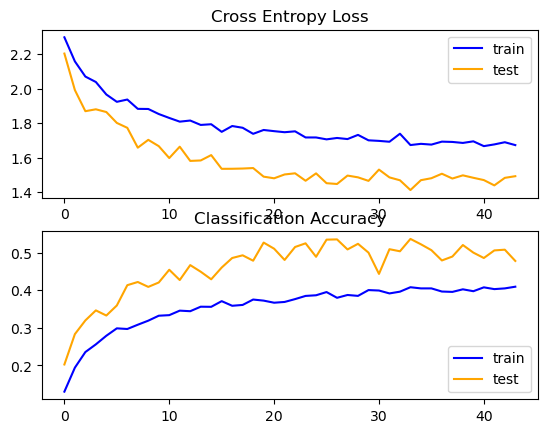

In [19]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_3.history['loss'], color='blue', label='train')
plt.plot(history_3.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_3.history['accuracy'], color='blue', label='train')
plt.plot(history_3.history['val_accuracy'], color='orange', label='test')
plt.legend()

Claramente el mejor modelo es el primer modelo que se realizó, por lo que se utilizará ese para comparar con las redes neuronales simples y el algoritmo diferente a deep learning

## Modelo que no es deep learning
### Random Forest

In [ ]:
def load_data(directory):
    data = []
    labels = []
    for label in os.listdir(directory):
        path = os.path.join(directory, label)
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28))  # Ensure images are 28x28
            img = tf.keras.preprocessing.image.img_to_array(img)
            data.append(img)
            labels.append(int(label))  # Convert label to an integer
    return np.array(data), np.array(labels)


train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

train_data = train_data.reshape(len(train_data), -1)
test_data = test_data.reshape(len(test_data), -1)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_data, train_labels)

predictions = rf_model.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print('Random Forest Accuracy: > %.3f' % (accuracy * 100.0))